<a href="https://colab.research.google.com/github/sujitojha1/ERA1/blob/main/Session8/ERA1_S8_CIFAR10_BatchNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Module and Models

In [106]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!git clone https://github.com/sujitojha1/ERA1 -q --quiet
!mv ERA1/Session8/*.py .
!rm -rf ERA1
print("Loaded Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded Modules and Models
  Preparing metadata (setup.py) ... done


## Loading train and test data with transforms and loader functions



In [108]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True
Files already downloaded and verified
Files already downloaded and verified


## Exploratory Data Analysis


### Summary Statistics

In [109]:
cifar10.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### Plotting sample images

Files already downloaded and verified


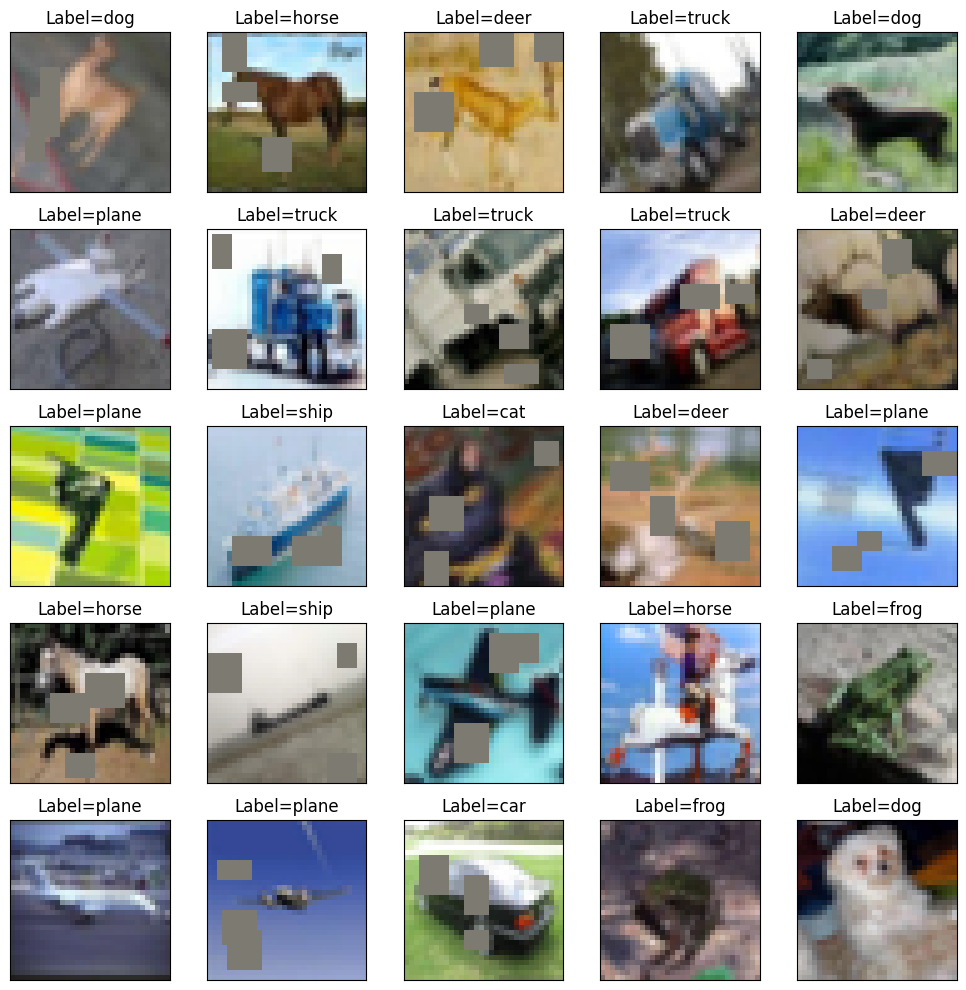

In [110]:
cifar10.sample_pictures(train_flag=True)

## The Model

In [111]:
from model import *

# Loading Custom Model
net = Net(normalizationMethod='BN')

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary



In [112]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
            Conv2d-4           [-1, 64, 32, 32]           9,216
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7           [-1, 64, 32, 32]             576
              ReLU-8           [-1, 64, 32, 32]               0
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 16, 32, 32]           1,024
             ReLU-11           [-1, 16, 32, 32]               0
      BatchNorm2d-12           [-1, 16, 32, 32]              32
    

## Define a Loss function and optimizer

In [113]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.2, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.2)

## Training and Testing

In [114]:
# Load train and test model
from main import *

train = train()
test = test()

EPOCHS= 20

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    test.execute(net, device, testloader, criterion)

print('Finished Training')

Epoch: 0,Loss=1.53 Batch_id=390 Accuracy=44.26: 100%|██████████| 391/391 [00:19<00:00, 20.22it/s]


Test set: Average loss: 0.0104, Accuracy: 5330/10000 (53.30%)



Epoch: 1,Loss=1.15 Batch_id=390 Accuracy=54.17: 100%|██████████| 391/391 [00:17<00:00, 21.90it/s]


Test set: Average loss: 0.0088, Accuracy: 6081/10000 (60.81%)



Epoch: 2,Loss=1.14 Batch_id=390 Accuracy=58.20: 100%|██████████| 391/391 [00:18<00:00, 21.22it/s]


Test set: Average loss: 0.0078, Accuracy: 6519/10000 (65.19%)



Epoch: 3,Loss=1.13 Batch_id=390 Accuracy=60.83: 100%|██████████| 391/391 [00:18<00:00, 21.02it/s]


Test set: Average loss: 0.0071, Accuracy: 6904/10000 (69.04%)



Epoch: 4,Loss=1.08 Batch_id=390 Accuracy=62.57: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]


Test set: Average loss: 0.0069, Accuracy: 6967/10000 (69.67%)



Epoch: 5,Loss=1.23 Batch_id=390 Accuracy=63.89: 100%|██████████| 391/391 [00:20<00:00, 18.98it/s]


Test set: Average loss: 0.0075, Accuracy: 6652/10000 (66.52%)



Epoch: 6,Loss=0.92 Batch_id=390 Accuracy=68.68: 100%|██████████| 391/391 [00:18<00:00, 21.67it/s]


Test set: Average loss: 0.0059, Accuracy: 7382/10000 (73.82%)



Epoch: 7,Loss=1.08 Batch_id=390 Accuracy=69.25: 100%|██████████| 391/391 [00:18<00:00, 21.46it/s]


Test set: Average loss: 0.0057, Accuracy: 7533/10000 (75.33%)



Epoch: 8,Loss=0.91 Batch_id=390 Accuracy=70.02: 100%|██████████| 391/391 [00:19<00:00, 20.32it/s]


Test set: Average loss: 0.0055, Accuracy: 7563/10000 (75.63%)



Epoch: 9,Loss=1.02 Batch_id=390 Accuracy=70.40: 100%|██████████| 391/391 [00:18<00:00, 20.90it/s]


Test set: Average loss: 0.0055, Accuracy: 7616/10000 (76.16%)



Epoch: 10,Loss=0.82 Batch_id=390 Accuracy=70.79: 100%|██████████| 391/391 [00:18<00:00, 21.32it/s]


Test set: Average loss: 0.0055, Accuracy: 7601/10000 (76.01%)



Epoch: 11,Loss=0.61 Batch_id=390 Accuracy=71.09: 100%|██████████| 391/391 [00:19<00:00, 19.93it/s]


Test set: Average loss: 0.0054, Accuracy: 7627/10000 (76.27%)



Epoch: 12,Loss=0.84 Batch_id=390 Accuracy=72.09: 100%|██████████| 391/391 [00:18<00:00, 20.80it/s]


Test set: Average loss: 0.0052, Accuracy: 7731/10000 (77.31%)



Epoch: 13,Loss=0.69 Batch_id=390 Accuracy=72.16: 100%|██████████| 391/391 [00:18<00:00, 21.50it/s]


Test set: Average loss: 0.0052, Accuracy: 7724/10000 (77.24%)



Epoch: 14,Loss=0.62 Batch_id=390 Accuracy=72.34: 100%|██████████| 391/391 [00:19<00:00, 20.29it/s]


Test set: Average loss: 0.0052, Accuracy: 7714/10000 (77.14%)



Epoch: 15,Loss=0.70 Batch_id=390 Accuracy=72.35: 100%|██████████| 391/391 [00:18<00:00, 21.58it/s]


Test set: Average loss: 0.0051, Accuracy: 7740/10000 (77.40%)



Epoch: 16,Loss=0.82 Batch_id=390 Accuracy=72.72: 100%|██████████| 391/391 [00:20<00:00, 19.11it/s]


Test set: Average loss: 0.0051, Accuracy: 7724/10000 (77.24%)



Epoch: 17,Loss=0.68 Batch_id=390 Accuracy=72.80: 100%|██████████| 391/391 [00:17<00:00, 21.73it/s]


Test set: Average loss: 0.0052, Accuracy: 7751/10000 (77.51%)



Epoch: 18,Loss=0.68 Batch_id=390 Accuracy=72.86: 100%|██████████| 391/391 [00:19<00:00, 20.39it/s]


Test set: Average loss: 0.0052, Accuracy: 7751/10000 (77.51%)



Epoch: 19,Loss=0.76 Batch_id=390 Accuracy=73.14: 100%|██████████| 391/391 [00:17<00:00, 21.90it/s]


Test set: Average loss: 0.0051, Accuracy: 7755/10000 (77.55%)

Finished Training


## Display an image from the test set

Files already downloaded and verified


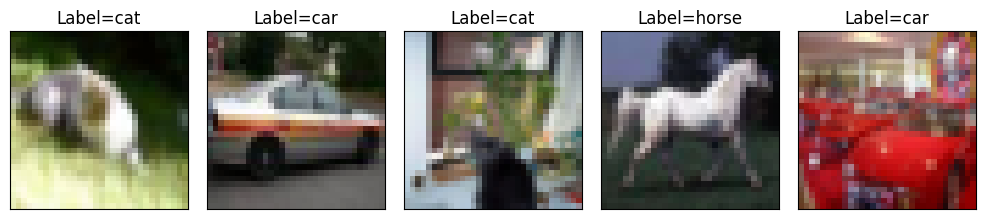

In [115]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

## Prediction of sampe test set

In [116]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:   bird   car   cat horse truck


## Evaluating Train Accuracy

In [117]:
from evaluate import *
calAccuracy(net, trainloader, device)

Accuracy of the network on the  train images: 73.732 %%


## Evaluating Test Accuracy

In [118]:
calAccuracy(net, testloader, device)

Accuracy of the network on the  train images: 77.55 %%


## Evaluating test Accuracy over different classes

In [119]:
calClassAccuracy(net, testloader,classes, device)

Accuracy of plane : 86 %
Accuracy of   car : 93 %
Accuracy of  bird : 68 %
Accuracy of   cat : 58 %
Accuracy of  deer : 76 %
Accuracy of   dog : 89 %
Accuracy of  frog : 88 %
Accuracy of horse : 92 %
Accuracy of  ship : 97 %
Accuracy of truck : 79 %


## Misclassified Images

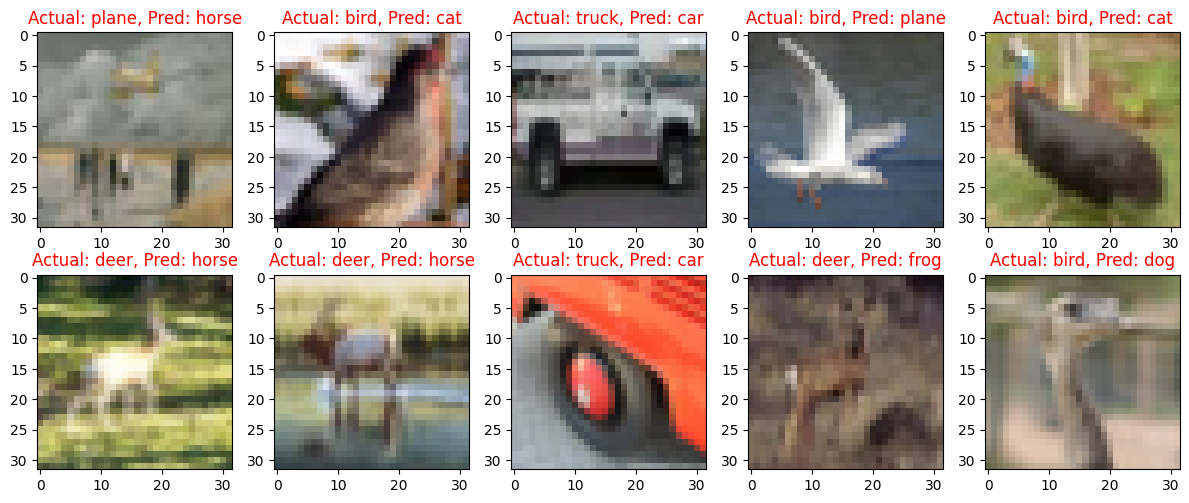

In [120]:
from utils import plot_misclassified_images
plot_misclassified_images(net, testloader, classes, device)